In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr2 = np.load('/mnt/NAS/youngwon/data/all/SN00000303.npy')
arr = np.load('/mnt/NAS/youngwon/data/label/SN00000303_mask.npy')

In [7]:
len(arr2),len(arr)

(354, 354)

In [2]:
arr = np.load('/mnt/NAS/youngwon/data/label/SN00000130_mask.npy')

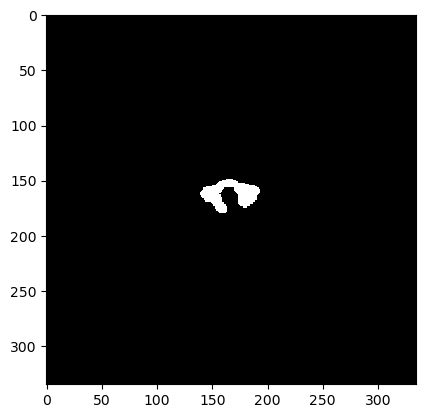

In [5]:
plt.imshow(arr[1],cmap='gray')

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def dice_coef(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    smooth = 0.0001
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def dice_coef_multilabel(y_true, y_pred, numLabels):
    dice=0
    for index in range(numLabels):
        dice += dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    return dice/numLabels # taking average

num_class = 5

imgA = np.random.randint(low=0, high= 2, size=(5,1, 64, 64, num_class) ) # 5 images in batch, channel, depths, width, height, num_classes map
imgB = np.random.randint(low=0, high= 2, size=(5,1, 64, 64, num_class) )

In [66]:
imgA.shape

(5, 1, 1, 64, 64, 5)

In [67]:

# plt.imshow(imgA[0,:,:,0]) # for 0th image, class 0 map
# plt.show()

# plt.imshow(imgB[0,:,:,0]) # for 0th image, class 0 map
# plt.show()

dice_score = dice_coef_multilabel(imgA, imgB, num_class)
print(f'For A and B {dice_score}')

dice_score = dice_coef_multilabel(imgA, imgA, num_class)
print(f'For A and A {dice_score}')

For A and B 0.5111127476632478
For A and A 1.0


In [4]:
from dataset import *
import multiprocessing
train_dataset = BaseDataset('/mnt/NAS/youngwon/data/crop_train0.csv',phase='Train')
valid_dataset = BaseDataset('/mnt/NAS/youngwon/data/crop_val0.csv',phase='Val')
train_loader = DataLoader(
    train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=multiprocessing.cpu_count()//2,
    )
valid_loader = DataLoader(
    valid_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=multiprocessing.cpu_count()//2,
    )

In [58]:
a = np.array([[[[1,2,3],
              [4,5,6],
              [7,8,9]]]])
b = np.array([[[[1,2,3],
              [4,5,6],
              [7,8,9]]]])

In [60]:
np.equal(a,b)

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]]])